In [1]:
%load_ext autoreload
%autoreload 2

# Retrospective Virtual Screening

In [18]:
from openpharmacophore.screening.screening3D import RetrospectiveScreening3D
from openpharmacophore.screening.screening2D import RetrospectiveScreening2D
from openpharmacophore.structured_based import StructuredBasedPharmacophore

from rdkit import Chem
import os
import pickle

# 3D Screening with ESR1 Pharmacophore
A pharmacophore for ESR1 is elucidated. The corresponding PDB entry for the estrogen receptor complexed with estradiol is 1QKU

In [4]:
# file = "../../data/pdbs/1qku.pdb"
pdb_id = "1QKU"
pharmacophore = StructuredBasedPharmacophore().from_pdb(pdb_id)
pharmacophore

1QKU PDB contains the following ligands:

EST:A:600
EST:B:600
EST:C:600

Please enter for which one the pharmacophore should be computed 


 EST:A:600


StructuredBasedPharmacophore(n_elements: 6)

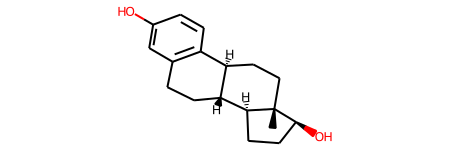

In [5]:
pharmacophore.ligand

In [6]:
pharmacophore.ligand.GetNumConformers()

1

In [7]:
pharmacophore.show()

NGLWidget()

In [ ]:
screener = RetrospectiveScreening3D()

### Load PubChem bioactivity data for Estrogen Receptor 1 (ESR1)

Bioactivity data was taken from the PubChem assay 713. See pubchem notebook in databases folder.

In [3]:
#data_dir = "../../data/ligands"
#esr1_file = "pubchem_data_esr1"

#with open(os.path.join(data_dir, esr1_file), "rb") as f:
#    esr1_data = pickle.load(f)

#actives = esr1_data["actives"]
#inactives = esr1_data["inactives"]
#print("Number of actives {}".format(len(actives[0])))
#print("Number of inactives {}".format(len(inactives[0])))

Number of actives 221
Number of inactives 218


In [13]:
data_dir = "../../data/ligands"
esr1_file = "er1_bioactivity"

with open(os.path.join(data_dir, esr1_file), "rb") as f:
    esr1_data = pickle.load(f)

molecules = esr1_data["molecules"]
bioactivity = esr1_data["bioactivity"]
print("Number of compounds {}".format(len(molecules)))
print("Bioactivity shape {}".format(bioactivity.shape))

Number of compounds 439
Bioactivity shape (439,)


# 2D Screening with a query molecule for EGFR

## ChemBl bioactivity data for Epidermal growth factor receptor (EGFR)

In [15]:
# egfr_file = "chembl_data_egfr"

# with open(os.path.join(data_dir, egfr_file), "rb") as f:
#    egfr_data = pickle.load(f)

# actives = egfr_data["actives"]
# inactives = egfr_data["inactives"]
# print("Number of actives {}".format(len(actives[0])))
# print("Number of inactives {}".format(len(inactives[0])))

In [20]:
egfr_file = "egfr_bioactivity"

with open(os.path.join(data_dir, egfr_file), "rb") as f:
    egfr_data = pickle.load(f)

molecules = egfr_data["molecules"]
bioactivity = egfr_data["bioactivity"]
print("Number of compounds {}".format(len(molecules)))
print("Bioactivity shape {}".format(bioactivity.shape))

Number of compounds 6052
Bioactivity shape (6052,)


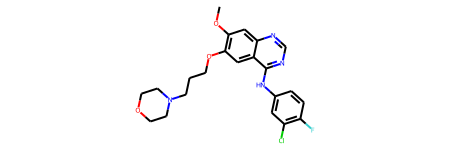

In [21]:
query = Chem.MolFromSmiles("COC1=C(OCCCN2CCOCC2)C=C2C(NC3=CC(Cl)=C(F)C=C3)=NC=NC2=C1")
query

In [ ]:
screener2D = RetrospectiveScreening2D(query)